X.shape() : (26, 2)
mglearn.discrete_scatter(X[:,0],X[:,1],y)についての理解を深める


/Users/humu/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


numpy.ndarray

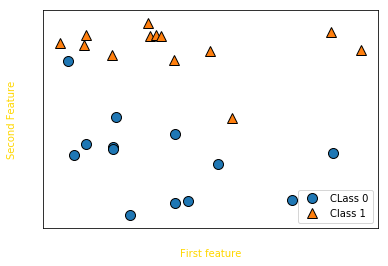

In [133]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams.update({'xtick.color':'w','ytick.color':'w','axes.labelcolor':'gold',})
# 下記はクラス分類
X , y =  mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y) # 　第3軸はラベルを表す
plt.legend(["CLass 0","Class 1"],loc=4)
plt.xlabel('First feature')
plt.ylabel('Second Feature')
print('X.shape() : {}'.format(X.shape))
print('mglearn.discrete_scatter(X[:,0],X[:,1],y)についての理解を深める')
type(y)

Text(0, 0.5, 'Target')

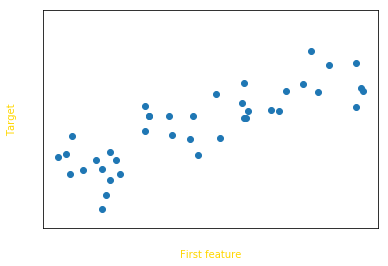

In [134]:
# 下記は回帰
X,y = mglearn.datasets.make_wave(n_samples=40) # 特徴量と　連続値のターゲット変数を返す
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel('First feature')
plt.ylabel('Target')


In [135]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
cancer = load_breast_cancer()
print('cancer.keys():\n{}'.format(cancer.keys()))
type(cancer)
print('shape of cancer data:\n{}'.format(cancer.data.shape))
print(' sample count per class:{} '.format({n:v for n ,v in zip(cancer.target_names, np.bincount(cancer.target))}))
print('Feature names:\n{}'.format(cancer.feature_names))
cancer.DESCR

cancer.keys():
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
shape of cancer data:
(569, 30)
 sample count per class:{'malignant': 212, 'benign': 357} 
Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


'Breast Cancer Wisconsin (Diagnostic) Database\n=============================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance, field 3 is Mean Rad

In [136]:
from sklearn.datasets import load_boston
boston = load_boston()
print('Data shape:{}'.format(boston.data.shape))
print(boston.DESCR)

Data shape:(506, 13)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher

In [137]:
X,y = mglearn.datasets.load_extended_boston()
print('X.shape:{}'.format(X.shape))

X.shape:(506, 104)


/Users/humu/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


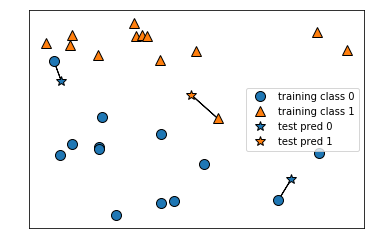

In [138]:
mglearn.plots.plot_knn_classification(n_neighbors=1) # テストから一番近い点の数の個数を指定する

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X , y =  mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test =  train_test_split(X,y,random_state=0)
clf =  KNeighborsClassifier(n_neighbors=3) # 近似点などのパラムを渡すことができる
# 訓練セットでクラス分類機を訓練する
clf.fit(X_train,y_train)



/Users/humu/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [140]:
print('予想:\n{}'.format(clf.predict(X_test))) # X_test に対する予想

予想:
[1 0 1 0 1 0 0]


In [141]:
print('モデル汎化性の評価:{:.2f}'.format(clf.score(X_test,y_test)))


モデル汎化性の評価:0.86


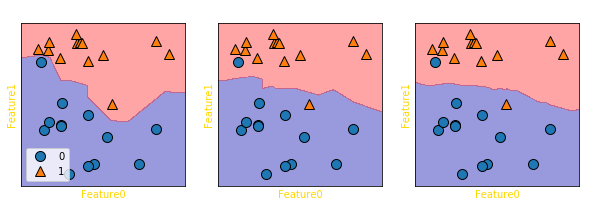

In [142]:
fig, axes =  plt.subplots(1,3,figsize=(10,3)) # fig は図,axes はオブジェクトを返す
for n_neighbors, ax in zip([1,3,9], axes):
    clf =  KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title('{} neighbor(s) '.format(n_neighbors),color='w')
    ax.set_xlabel("Feature0")
    ax.set_ylabel("Feature1")
    axes[0].legend(loc=3)
    

 過剰適合と適合不足の中間を探す


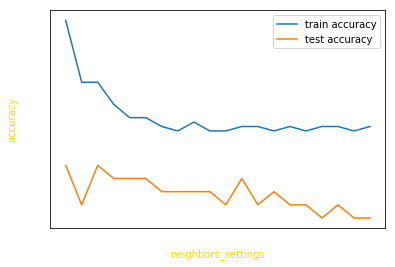

In [143]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=66)
training_accuracy = []
test_accuracy = []
# 近傍値を1~10まで試す
neighbors_settings = range(1,21)
for neighbors in neighbors_settings:
    clf =  KNeighborsClassifier(n_neighbors=neighbors)
    clf.fit(X_train,y_train) #  モデル構築
    # 訓練データの精度を確認
    training_accuracy.append(clf.score(X_train,y_train))
    # 汎化データの精度を確認
    test_accuracy.append(clf.score(X_test,y_test))
plt.plot(neighbors_settings,training_accuracy,label='train accuracy') # xはsetting毎,yは精度
plt.plot(neighbors_settings,test_accuracy,label='test accuracy')
plt.xlabel('neighbors_settings')
plt.ylabel('accuracy')
plt.legend()
print(' 過剰適合と適合不足の中間を探す')
    


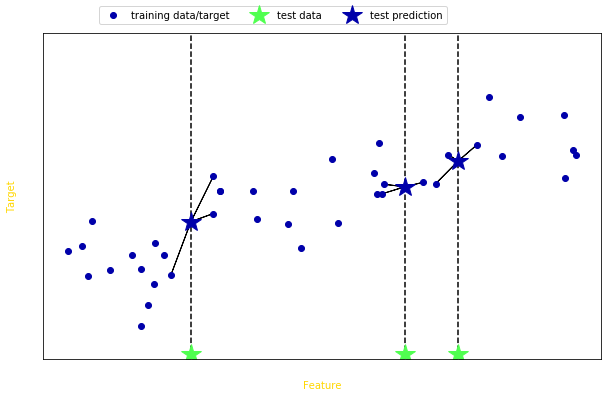

In [144]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [145]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
reg =  KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)
print('テストデータで予想:\n{}'.format(reg.predict(X_test)))
print('テストR2:{:.2f}'.format(reg.score(X_test,y_test)))


テストデータで予想:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
テストR2:0.83


In [146]:
mglearn.datasets.make_wave??

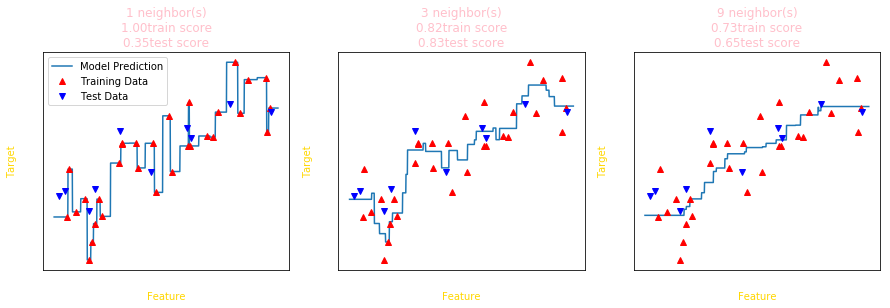

In [147]:
fig,axes = plt.subplots(1,3,figsize=(15,4))
# -3~3までの間に1000点のデータポイントを作る
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axes): # 近傍値 1 3 9
    reg = KNeighborsRegressor(n_neighbors=n_neighbors) #  近傍値から回帰アルゴリズム
    reg.fit(X_train,y_train)
    ax.plot(line, reg.predict(line)) #  X_train y_trainを使った推定機でlineの値を予想 | line(x)とlineの結果(y)のグラフ
    ax.plot(X_train,y_train,'^',c='r')
    ax.plot(X_test,y_test,'v',c='b')
    ax.set_title(
        "{} neighbor(s)\n{:.2f}train score\n{:.2f}test score".format(
            n_neighbors,
            reg.score(X_train,y_train),
            reg.score(X_test,y_test)),color='pink')
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
    axes[0].legend(["Model Prediction","Training Data","Test Data"],loc="best")    
    

In [148]:
line_df = pd.DataFrame(data=line,columns=['Line'])
X_df  = pd.DataFrame(data=X,columns=['X'])
y_df = pd.DataFrame(y,columns=['y'])
ful = line_df.join(X_df).join(y_df)
ful[:10]

,Line,X,y
0,-3.000000,-0.752759,-0.448221
1,-2.993994,2.704286,0.331226
2,-2.987988,1.391964,0.779321
3,-2.981982,0.591951,0.034979
4,-2.975976,-2.063888,-1.387736
5,-2.969970,-2.064033,-2.471962
6,-2.963964,-2.651498,-1.527308
7,-2.957958,2.197057,1.494172
8,-2.951952,0.606690,1.000324
9,-2.945946,1.248435,0.229562


w[0]: 0.393906  b: -0.031804


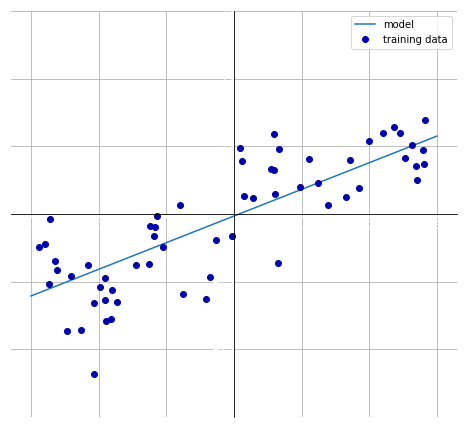

In [149]:
mglearn.plots.plot_linear_regression_wave()

In [150]:
from sklearn.linear_model import LinearRegression
X,y =  mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test =  train_test_split(X, y, random_state=42)

In [151]:
lr = LinearRegression().fit(X_train,y_train)

In [152]:
print( 'Lr.coef_(ω): {}'.format(lr.coef_))
print('Lr.intercept_(b): {}'.format(lr.intercept_))

Lr.coef_(ω): [0.39390555]
Lr.intercept_(b): -0.031804343026759746


In [153]:
print('訓練スコア:{:.2f}'.format(lr.score(X_train,y_train)))
print('テストスコア:{:.2f}'.format(lr.score(X_test,y_test)))
print('テストスコアと訓練スコアが近いため　これはおそらく適合不足と言える')

訓練スコア:0.67
テストスコア:0.66
テストスコアと訓練スコアが近いため　これはおそらく適合不足と言える


In [154]:
X, y = mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test =  train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train,y_train)
print('訓練スコア:{:.2f}'.format(lr.score(X_train,y_train)))
print('テストスコア:{:.2f}'.format(lr.score(X_test,y_test)))
print('高次元つまり特徴量を多く持つデータセットに対しては過剰適合になりやすい') # よって、複雑度を制御できるモデルが必要になる。

訓練スコア:0.95
テストスコア:0.61
高次元つまり特徴量を多く持つデータセットに対しては過剰適合になりやすい


In [155]:
print('制御(個々の特徴量が出力に与える影響(傾き)をなるべく小さくする制御)できるモデルリッジ回帰法')

制御(個々の特徴量が出力に与える影響(傾き)をなるべく小さくする制御)できるモデルリッジ回帰法


In [156]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train) # デフォルトはalpha=1
print('訓練スコア:{:.2f}'.format(ridge.score(X_train,y_train)))
print('テストスコア:{:.2f}'.format(ridge.score(X_test,y_test)))

訓練スコア:0.89
テストスコア:0.75


In [157]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train) #汎化を増やし、性能を落とす
print('訓練スコア:{:.2f}'.format(ridge10.score(X_train,y_train)))
print('テストスコア:{:.2f}'.format(ridge10.score(X_test,y_test)))


訓練スコア:0.79
テストスコア:0.64


In [158]:
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train) #汎化を減らし、性能を増やす
print('訓練スコア:{:.2f}'.format(ridge01.score(X_train,y_train)))
print('テストスコア:{:.2f}'.format(ridge01.score(X_test,y_test)))

訓練スコア:0.93
テストスコア:0.77


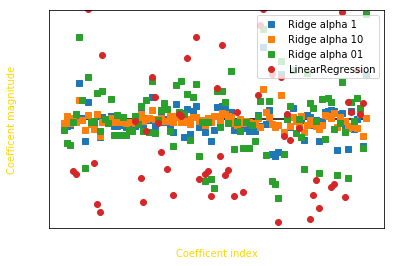

In [159]:
plt.plot(ridge.coef_,'s',label='Ridge alpha 1')
plt.plot(ridge10.coef_,'s',label='Ridge alpha 10')
plt.plot(ridge01.coef_,'s',label='Ridge alpha 01')

plt.plot(lr.coef_, 'o',label='LinearRegression')
plt.xlabel("Coefficent index")
plt.ylabel('Coefficent magnitude')
plt.ylim(-25,25)
plt.hlines(0,0,len(lr.coef_))
plt.legend(loc=1)


これにより十分なデータがある場合は正則化はあまり重要ではなく過剰適合に気をつけるべきだが、データがないならリッジ回帰(正規化)は有効である


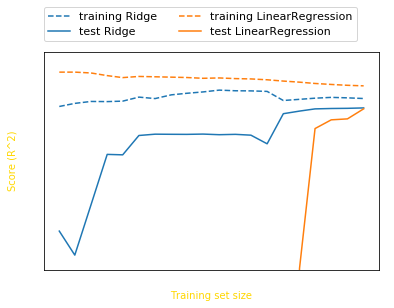

In [160]:
mglearn.plots.plot_ridge_n_samples()
print('これにより十分なデータがある場合は正則化はあまり重要ではなく過剰適合に気をつけるべきだが、データがないならリッジ回帰(正規化)は有効である')

In [161]:
print(
'''
・L1正則化　特定のデータの重みを0にする事で、不要なデータを削除する
・L2正則化　データの大きさに応じて0に近づけて、滑らかなモデルとする
'''
)


・L1正則化　特定のデータの重みを0にする事で、不要なデータを削除する
・L2正則化　データの大きさに応じて0に近づけて、滑らかなモデルとする



In [162]:
from sklearn.linear_model import Lasso

 # 特徴量が制御されすぎている→alphaを減らす

In [163]:
lasso001 = Lasso(alpha=0.01).fit(X_train,y_train)
print('訓練スコア:{:.2f}'.format(lasso001.score(X_train,y_train)))
print('テストスコア:{:.2f}'.format(lasso001.score(X_test,y_test)))
print('使用されている特徴量の数: {}個/104個'.format(np.sum(lasso001.coef_ !=0)))

訓練スコア:0.90
テストスコア:0.77
使用されている特徴量の数: 32個/104個


/Users/humu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [164]:
lasso00001 = Lasso(alpha=0.0001).fit(X_train,y_train)
print('訓練スコア:{:.2f}'.format(lasso00001.score(X_train,y_train)))
print('テストスコア:{:.2f}'.format(lasso00001.score(X_test,y_test)))
print('使用されている特徴量の数: {}個/104個'.format(np.sum(lasso00001.coef_ !=0))) # alphaを小さくしすぎると正則化の効果が薄れる。

訓練スコア:0.94
テストスコア:0.70
使用されている特徴量の数: 100個/104個


In [165]:
plt.plot(lasso.coef_,'s',label='lasso alpha=1')
plt.plot(lasso001.coef_,'^',label='lasso alpha=0.01')
plt.plot(lasso00001.coef_,'v',label='lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o',label='Ridge alpha=0.1')
plt.xlabel("Coefficent index")
plt.ylabel('Coefficent magnitude')
plt.ylim(-25,25)
plt.legend(ncol=2, loc=(0,1.05))

NameError: name 'lasso' is not defined

In [ ]:
print('LassoとRidgeを組み合わせたElasticNetクラスが存在する。L1,L2正則性二つを調整する必要がある')

/Users/humu/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


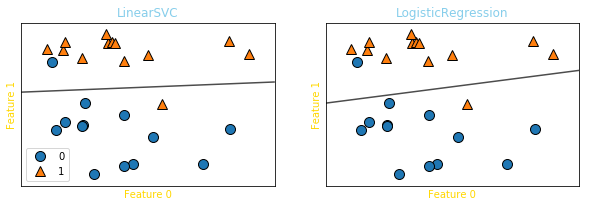

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()
fig, axes =  plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()],axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,ax=ax,alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__), color='skyblue')
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

In [ ]:
mglearn.plots.plot_linear_svc_regularization()

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(
cancer.data,cancer.target, stratify=cancer.target,random_state =42
)

In [ ]:
logreg = LogisticRegression().fit(X_train,y_train)
print('訓練用スコア:{:.3f}'.format(logreg.score(X_train,y_train)))
print('テスト用スコア:{:.3f}'.format(logreg.score(X_test,y_test)))
print('訓練スコアとテストスコアが近いので、適合不足の可能性が高い。よってC値を増やして適合を強化する')

In [ ]:
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
print('訓練用スコア:{:.3f}'.format(logreg100.score(X_train,y_train)))
print('テスト用スコア:{:.3f}'.format(logreg100.score(X_test,y_test))) # 結果より複雑な方が性能が高いとわかる

In [ ]:
logreg001 = LogisticRegression(C=0.01).fit(X_train,y_train)
print('訓練用スコア:{:.3f}'.format(logreg001.score(X_train,y_train)))
print('テスト用スコア:{:.3f}'.format(logreg001.score(X_test,y_test))) # 上記2件より、適合不足が進みより精度が落ちることがわかる

In [ ]:
plt.plot(logreg.coef_.T,'o',label='logreg C=1')
plt.plot(logreg100.coef_.T,'^',label='logreg C=100')
plt.plot(logreg001.coef_.T,'v',label='logreg C=0.001')
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel('Coefficent magnitude')
plt.ylim(-5,5)
plt.legend()

In [ ]:
for C,marker in zip([0.01,1,100],['o','^','v']):
    lr_l1 = LogisticRegression(C=C,penalty="l1").fit(X_train,y_train)
    print('L1の訓練精度とC値:{:.3f}|{:.2f}'.format(lr_l1.score(X_train,y_train),C))
    print('L1のテスト精度とC値:{:.3f}|{:.2f}'.format(lr_l1.score(X_test,y_test),C))
    plt.plot(lr_l1.coef_.T,marker,label="{:.3f}".format(C))
    plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel('Coefficent magnitude')
plt.ylim(-5,5)
plt.legend(loc=3)

In [ ]:
from sklearn.datasets import make_blobs
X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0','Class 1','Class 2'])

In [ ]:
# このデータセットでLinearSVCクラスを勉強させる
linear_svm =  LinearSVC().fit(X,y)
print('回帰係数の形状: ',linear_svm.coef_.shape) # ３クラスと2種類のデータセットx,y
print('切片の形状: ',linear_svm.intercept_.shape) #3クラスとそれぞれの切片


In [ ]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b','r','g']):
    plt.plot(line,-(line * coef[0] + intercept) / coef[1], c=color) # (line(x) * a(X) + b)/a(y)
    plt.ylim(-10,15)
    plt.xlim(-10,8)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.legend(['Class0','Class1','Class2','Line Class 0','Line class 1','Line Class 2'], loc=(1.01,0.3))
print('それぞれの線がある特定の線とその他の関係で表示される')

In [ ]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b','r','g']):
    plt.plot(line,-(line * coef[0] + intercept) / coef[1], c=color) # (line(x) * a(X) + b)/a(y)
    plt.ylim(-10,15)
    plt.xlim(-10,8)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.legend(['Class0','Class1','Class2','Line Class 0','Line class 1','Line Class 2'], loc=(1.01,0.3))
print('中央の三角形はそれぞれの線からの最短距離の点で分割する')


In [ ]:
print('ナイーブベイズクラス分類器')
X =  np.array([[0,1,0,1],[1,0,1,1],[0,0,0,1], [1,0,1,0]])
y = np.array([0,1,0,1])
X[y == 0] # y=0はindex0,2だけなので、それのXを抽出し合計する。

In [ ]:
counts = {}
for label in np.unique(y):
    counts[label] =  X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))
    

In [ ]:
mglearn.plots.plot_animal_tree
print('過剰適合を防ぐ方法:1 事前枝刈り|2事後枝刈り ')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test =  train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
tree = DecisionTreeClassifier(max_depth=4,random_state=0) # 木の深さを指定することで過剰適合が抑制される
tree.fit(X_train,y_train)
print('訓練用データの精度{:.3f}'.format(tree.score(X_train,y_train)))
print('テストデータの精度{:.3f}'.format(tree.score(X_test,y_test)))


In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file='tree.dot',class_names=["malignant","benign"],feature_names=cancer.feature_names,impurity=False,filled=True)

In [ ]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [ ]:
print('特徴量の重要性:\n{}'.format(tree.feature_importances_))

In [ ]:
def plot_feature_importances_cancer(model):
    n_feature = cancer.data.shape[1] # 特徴量
    plt.barh(range(n_feature),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_feature),cancer.feature_names)
    plt.xlabel('Feature importace')
    plt.ylabel('Feature')
    
plot_feature_importances_cancer(tree)
    

In [ ]:
tree = mglearn.plots.plot_tree_not_monotone()

In [ ]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,"ram_price.csv"))

plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel('Year')
plt.ylabel('Price in $/Mbyte')

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# 過去のデータから2000年以降のデータを予想する
data_train =  ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]
# 日ずけに基づき価格を予想
X_train = data_train.date[:,np.newaxis] # newaxis により それぞれの時間データが独立する
# データとターゲットの関係を単純にするために対数変換
y_train =  np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train,y_train)
linear_reg =  LinearRegression().fit(X_train,y_train)
# 全ての価格予想
X_all =  ram_prices.date[:,np.newaxis] #  この値xからyを推測
pred_tree = tree.predict(X_all)
pred_linear = linear_reg.predict(X_all)
price_tree = np.exp(pred_tree)
price_linear = np.exp(pred_linear)

In [ ]:
plt.semilogy(data_train.date,data_train.price,label='trainning data')
plt.semilogy(data_test.date,data_test.price,label='test data')
plt.semilogy(ram_prices.date,price_tree,label='tree data') # 決定木は新しい結果を生成して返すことはできない。よって知り得る最後の点を返し続ける
plt.semilogy(ram_prices.date,price_linear,label='Linear data')
plt.legend(loc='best')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X,y  =  make_moons(n_samples=100,noise=0.5,random_state=3)
X_train,X_test,y_train,y_test =  train_test_split(X,y,stratify=y,random_state=42)
forest = RandomForestClassifier(n_estimators=5,random_state= 2) # estimator は決定木の数
forest.fit(X_train,y_train)
fig, axes =  plt.subplots(2,3,figsize=( 20,10))
for i , (ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title('Tree {}'.format(i),color='w')
    mglearn.plots.plot_tree_partition(X_train,y_train,tree,ax=ax)
    mglearn.plots.plot_2d_separator(forest, X_train, fill=True,ax=axes[-1,-1],alpha=.4)
    axes[-1,-1].set_title("Random forest",color='y')
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
    


In [ ]:
X_train,X_test,y_train,y_test =  train_test_split(cancer.data,cancer.target,random_state=0)
forest =  RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)
print(' 訓練用データの精度{:.3f}'.format(forest.score(X_train,y_train)))
print(' テストデータの精度{:.3f}'.format(forest.score(X_test,y_test)))

In [ ]:
plot_feature_importances_cancer(forest)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
X_train,X_test,y_train,y_test =  train_test_split(cancer.data,cancer.target,random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)
print(' 訓練用データの精度{:.3f}'.format(gbrt.score(X_train,y_train))) 
# 訓練データが100より過剰適合している可能性があるんで学習率を下げる
print(' テストデータの精度{:.3f}'.format(gbrt.score(X_test,y_test)))

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)
print(' 訓練用データの精度{:.3f}'.format(gbrt.score(X_train,y_train))) 
# 訓練データが100より過剰適合している可能性があるんで学習率を下げる
print(' テストデータの精度{:.3f}'.format(gbrt.score(X_test,y_test)))

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train,y_train)
print(' 訓練用データの精度{:.3f}'.format(gbrt.score(X_train,y_train))) 
# 訓練データが100より過剰適合している可能性があるんで学習率を下げる
print(' テストデータの精度{:.3f}'.format(gbrt.score(X_test,y_test)))

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)
plot_feature_importances_cancer(gbrt)# ランダムフォレストと違い、いくつかの特徴量が無視されている

In [ ]:
X, y =  make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('impossible 2 classfier',color='w')


In [ ]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)
mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('impossible 2 classfier',color='w')

In [ ]:
# 新しい特徴量を追加する。 2番目の特徴量の2乗を追加
X_new = np.hstack([X,X[:,1:] ** 2]) # 2次元から三次元に
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3Dで可視化
ax = Axes3D(figure,elev=-152,azim=-26)
# y== 0の点を先にプロットする
mask = y == 0
ax.scatter( X_new[mask,0], X_new[mask,1],X_new[mask,2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter( X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2,s=60)
ax.set_xlabel("Feature 0")
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature1 ** 2')

In [ ]:
linear_svm_3d =  LinearSVC().fit(X_new,y)
coef , intercept =  linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 線形決定境界の描写
figure =  plt.figure()
ax = Axes3D(figure,elev= -152,azim=-26)
xx = np.linspace(X_new[:,0].min() - 2,X_new[:,0].max() + 2,50)
yy = np.linspace(X_new[:,1].min() - 2,X_new[:,1].max() + 2,50) # ↑ +  →でドキュメントを一瞬見れる
XX, YY =  np.meshgrid(xx,yy) 
ZZ =  (coef[0] * XX +  coef[1] * YY + intercept) /-coef[2]
ax.plot_surface( XX,YY,ZZ,rstride=8,cstride=8,alpha=0.3)
ax.scatter( X_new[mask,0], X_new[mask,1],X_new[mask,2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter( X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2,s=60)
ax.set_xlabel("Feature 0")
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature1 ** 2')

In [ ]:
ZZ =  YY ** 2
dec  =  linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contourf( XX,YY,dec.reshape(XX.shape),levels=[dec.min(),0,dec.max()],cmap=mglearn.cm2, alpha=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [ ]:
from sklearn.svm import SVC
X, y =  mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf',C=10,gamma=0.1).fit(X,y) # Cは線形同様、正則化パラメータとして左右し、gammaはガウンシアンカーネルの幅などに左右する
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
sv =  svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter( sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
  for a, gamma in zip(ax, range(-1, 2)):
    mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

In [ ]:
X_train,X_test,y_train,y_test =  train_test_split(cancer.data,cancer.target,random_state=0)
svc = SVC()
svc.fit(X_train,y_train)
print('訓練用データの精度:{:.2f}'.format(svc.score(X_train,y_train))) # この値より過剰適合している
print('テスト用データの精度:{:.2f}'.format(svc.score(X_test,y_test)))
# plt.plot( X_train.min(axis=0),'o',label=' min')
# plt.plot(X_train.max(axis=0),'^',label='max')
plt.boxplot(X_train, sym='+')
plt.ylim(10**-1, 10**4)
plt.legend(loc=4)
plt.xlabel('Feature index')
plt.ylabel('Feature magnitude')
plt.yscale("log")

In [ ]:
# 最小値の計算
min_on_training = X_train.min(axis=0)
# レンジ = 最大値 - 最小値を計算
range_on_training = (X_train - min_on_training).max(axis=0)
# 最小値を引いてからレンジで割ることで、min=0、max=1に変換される
X_train_scaled = (X_train - min_on_training) / range_on_training
print("スケール済み特徴量の最小値: {}".format(X_train_scaled.min(axis=0)))
 ## スケール済み特徴量の最小値: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 ##  0. 0. 0. 0. 0. 0.]
print("スケール済み特徴量の最大値: {}".format(X_train_scaled.max(axis=0)))
 ## スケール済み特徴量の最大値: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 ##  1. 1. 1. 1. 1. 1.]

In [ ]:
# テストセットについても同様に行う。 ただし、最小値については訓練用の物を使用する
X_test_scaled = (X_test - min_on_training) / range_on_training
print("テストセットの最小値: {}".format(X_test_scaled.min(axis=0)))
print("テストセットの最大値: {}".format(X_test_scaled.max(axis=0)))

In [ ]:
svc = SVC()
svc.fit(X_train_scaled,y_train)
print('訓練用データの精度:{:.4f}'.format(svc.score(X_train_scaled,y_train)))
print('テストデータの精度:{:.4f}'.format(svc.score(X_test_scaled,y_test)))

In [ ]:
svc = SVC(C=1000)
svc.fit(X_train_scaled,y_train)
print('訓練用データの精度:{:.4f}'.format(svc.score(X_train_scaled,y_train)))
print('テストデータの精度:{:.4f}'.format(svc.score(X_test_scaled,y_test)))

In [ ]:
display(mglearn.plots.plot_logistic_regression_graph())

In [ ]:
display(mglearn.plots.plot_single_hidden_layer_graph())

In [ ]:
line =  np.linspace(-3,3,100)
plt.plot(line,np.tanh(line),label='tanh')
plt.plot(line,np.maximum(line,0),label="relu")
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x),tanh(x)')

In [ ]:
mglearn.plots.plot_two_hidden_layer_graph()

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)
mlp = MLPClassifier(solver='lbfgs',random_state=0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

In [ ]:
X,y = make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[100]).fit(X_train,y_train) # レイヤーサイズを指定するとなめらかじゃなくなる
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

In [ ]:
X,y = make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10,10]).fit(X_train,y_train) # 隠れ層を増やす
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

In [ ]:
mlp = MLPClassifier(solver='lbfgs',activation='tanh',random_state=0,hidden_layer_sizes=[10,10]).fit(X_train,y_train) # 隠れ層を増やす
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

In [ ]:
fig,axes = plt.subplots(2,4,figsize=(20,8))
for axx , n_hidden_nodes in zip(axes,[10,100]):
    for ax, alpha in zip(axx,[0.0001,0.01,0.1,1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3,ax=ax)
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
        ax.set_title("n_hidden_nodes=[{},{}]\nalpha|{:.4f}".format(n_hidden_nodes,n_hidden_nodes,alpha),color='lightgreen')

In [ ]:
fig,axes = plt.subplots(2,4,figsize=(20,8))
for i,ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,hidden_layer_sizes=[100,100]) 
    mlp.fit(X_train,y_train)
    mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3,ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
print('random_stateが変わるたびに全く異なるモデルが得られる')

In [ ]:
print("cancer data pre-feature max:\n{}".format(cancer.data.max(axis=0)))

In [ ]:
X_train,X_test,y_train,y_test =  train_test_split(cancer.data,cancer.target,random_state=0 )
mlp  = MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)
print('訓練用データの精度{:.2f}'.format(mlp.score(X_train,y_train)))
print('テスト用データの精度{:.2f}'.format(mlp.score(X_test,y_test)))

In [ ]:
# 訓練データの特徴量ごとに平均値を算出
mean_on_train =  X_train.mean(axis=0)
std_on_train =  X_train.std(axis=0)

In [ ]:
# 平均値からの+-差分表示にスケールする。
X_train_scaled =  (X_train - mean_on_train) / std_on_train
X_test_scaled =   (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled,y_train)
print('訓練用データの精度{:.3f}'.format(mlp.score(X_train_scaled,y_train)))
print('テスト用データの精度{:.3f}'.format(mlp.score(X_test_scaled,y_test)))



In [ ]:
mlp = MLPClassifier(max_iter=1000,random_state=0)
mlp.fit(X_train_scaled,y_train)
print('訓練用データの精度{:.3f}'.format(mlp.score(X_train_scaled,y_train)))
print('テスト用データの精度{:.3f}'.format(mlp.score(X_test_scaled,y_test)))

In [ ]:
mlp = MLPClassifier(max_iter=1000,alpha=1,random_state=0)
mlp.fit(X_train_scaled,y_train)
print('訓練用データの精度{:.3f}'.format(mlp.score(X_train_scaled,y_train)))
print('テスト用データの精度{:.3f}'.format(mlp.score(X_test_scaled,y_test)))

In [ ]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='none',cmap='viridis')
plt.yticks(range( 30),cancer.feature_names)
plt.xlabel('Columns in weight matrix')
plt.ylabel('Input feature')
plt.colorbar # 0に近いやつ は重みが小さい特徴量であまり重要ではないと言える。

In [ ]:
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.datasets import make_circles
X , y =  make_circles(noise=0.25, factor=0.5,random_state=1)
y_named =  np.array(["blue","red"])[y] #  0:blue,1:redに分ける
X_train,X_test,y_named_train,y_named_test,y_train,y_test =  train_test_split(X,y_named,y,random_state=0 )

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_named_train)
print('X_test.shape: {}'.format(X_test.shape))
print("Decision function shape:{}".format(gbrt.decision_function(X_test).shape))


In [ ]:
print('Desion function:\n{}'.format(gbrt.decision_function(X_test)[:10])) # 符号を見ることで予測クラスがわかる。

In [ ]:
print("Decision function  which ?:{}".format(gbrt.decision_function(X_test) > 0))

In [ ]:
print("Decision function predict:{}".format(gbrt.predict(X_test))) # 予測結果
gbrt.classes_ # それぞれのクラスのラベルを保持する index-label

In [ ]:
greater_zero =  (gbrt.decision_function(X_test) > 0).astype(int)
greater_zero
# 0|1をクラスのインデックスとして使う。
pred =  gbrt.classes_[greater_zero]

In [ ]:
np.all(pred == gbrt.predict(X_test))

In [ ]:
decision_function = gbrt.decision_function(X_test)
print("決定関数　最小:{:.2f} 最大:{:.2f} ".format(np.min(decision_function),np.max(decision_function)))

In [ ]:
# スケールを確認する。
fig, axes = plt.subplots(1,2,figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
fill=True, cm=mglearn.cm2)
score_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
alpha=.4, cm=mglearn.ReBl)
for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
markers='^', ax=ax)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
markers='o', ax=ax)
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
cbar = plt.colorbar(score_image,ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
"Train class 1"], ncol=4, loc=(.1, 1.1))

In [ ]:
print("Shape of probabilities: {}".format(gbrt.predict_proba(X_test).shape))

In [ ]:
# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(
gbrt.predict_proba(X_test[:6])))

In [171]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
iris.data, iris.target, random_state=42)
gbrt = GradientBoostingClassifier(learning_rate=0.01,random_state=0)
gbrt.fit(X_train, y_train)
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))
# plot the first few entries of the decision function
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6, :]))

Decision function shape: (38, 3)
Decision function:
[[-0.52931069  1.46560359 -0.50448467]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52379401 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53107259  1.28190451  0.21510024]
 [ 1.51154215 -0.49561142 -0.50310736]]


In [ ]:
print("Argmax of decision function:\n{}".format(np.argmax(gbrt.decision_function(X_test),axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

In [175]:
logreg = LogisticRegression()
named_target = iris.target_names[y_train]
logreg.fit(X_train,named_target)
print("unique classes in training data: {}".format(logreg.classes_))
print("predictions: {}".format(logreg.predict(X_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("argmax of decision function: {}".format(argmax_dec_func[:10]))
print("argmax combined with classes_: {}".format(
logreg.classes_[argmax_dec_func][:10]))

unique classes in training data: ['setosa' 'versicolor' 'virginica']
predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
argmax of decision function: [1 0 2 1 1 0 1 2 1 1]
argmax combined with classes_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
